In [1]:
#Haakon
import lightgbm as lgb  # standard alias
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import math

train = pd.read_csv('../feature_engineering/train_set.csv')
test = pd.read_csv('../feature_engineering/test_set.csv')
#train_data = pd.read_csv('../data/stores_train.csv')

import re
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

y_train = train['revenue']
train = train.iloc[: , :-1]

# For working
# X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)

# For Kaggle
X_train = train
X_test = test

# Save store ids, then remove this column
store_ids = X_test['store_id'].to_numpy()
ids = pd.DataFrame(store_ids)
ids.rename(columns={0 :'id'}, inplace=True )
X_train = X_train.drop('store_id',axis=1)
X_test = X_test.drop('store_id',axis=1)

#Hyper parameters
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 1000
}

#fit the model takes some time
gbm = lgb.LGBMRegressor(**hyper_params)

gbm.fit(X_train, y_train)



#predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

#generate csv file of id and prediction
predicted = pd.DataFrame(y_pred, columns = ['predicted'])
output = pd.concat([ids,predicted],axis=1)
output.to_csv('output_for_submission.csv',index=False)

# #calc rmse
# #MSE = np.square(np.subtract(y_train, y_pred)).mean() 
# #RMSE = math.sqrt(MSE)
# #print(RMSE)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

False

 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: rmsle 
     .. Study direction: minimize rmsle

     . Trial number: 0 finished
     .. Optimization score (lower-better): rmsle: 0.28334190534117976
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): rmsle: 0.28845069705651893
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): rmsle: 0.27700796806554945
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): rmsle: 0.2852263599528337
 ...........................................................................
     . Trial number: 4 finished
     .. Optimization score (lower-better): rmsle: 0.289435617912086
 ...............................

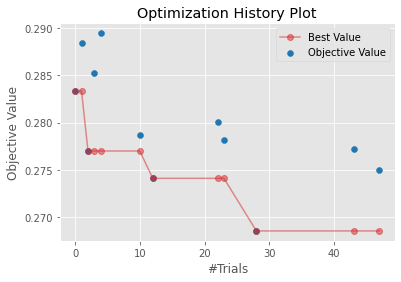

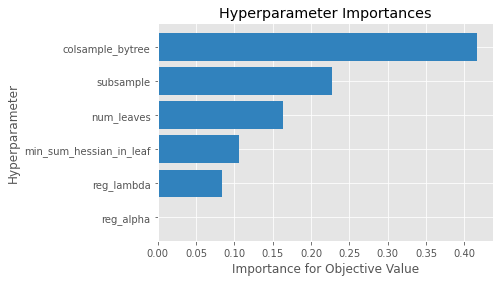

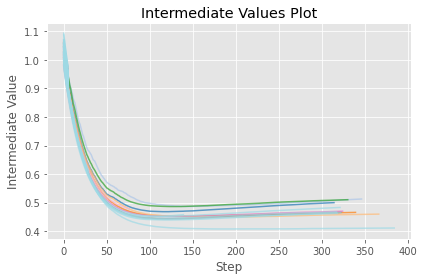

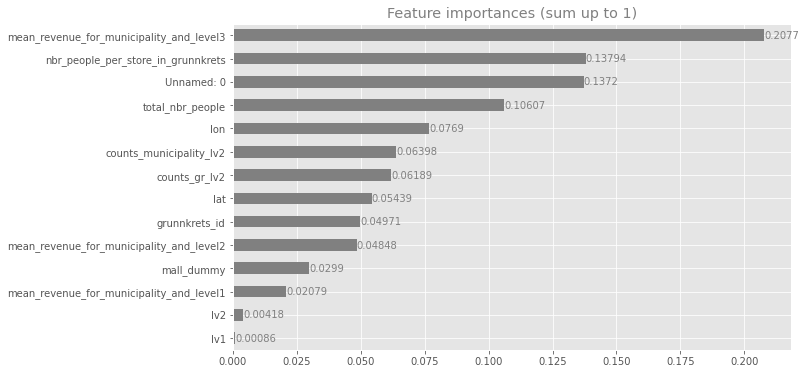


     . Optuna hyperparameters optimization finished
     .. Best trial number:28    |     rmsle:           0.2685702470952755
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  189   |     rmsle:           0.2708073247314564

Time elapsed for fit execution: 15.06569 seconds


In [19]:
import pandas as pd
from verstack import LGBMTuner
# import the data
train = pd.read_csv('../data/modified_data.csv')
test = pd.read_csv('../data/modified_test_data.csv')
test = test.drop('store_id', axis = 1)
X = train.drop('revenue', axis = 1)
X = X.drop('store_id', axis = 1)
y = train['revenue']
X = X.fillna(0)
y = y.fillna(0)
print(X.isnull().values.any())
# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'rmsle') # <- the only required argument
tuner.fit(X, y)
# check the optimization log in the console.
pred = tuner.predict(test)